<a href="https://colab.research.google.com/github/sarahmagdi/DL/blob/main/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

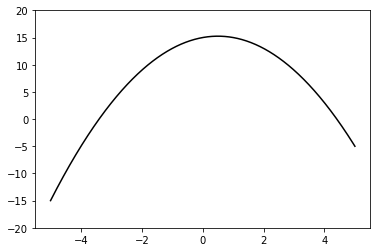

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

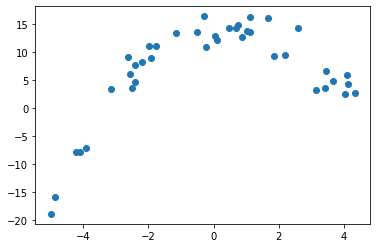

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly=PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X.reshape(-1,1))

    return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])
#print(X_poly)

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.20, random_state=42)
print(X_train[0:2])

[[ 3.42460223e+000  1.17279004e+001  4.01633940e+001  1.37543649e+002
   4.71032287e+002  1.61309822e+003  5.52421976e+003  1.89182553e+004
   6.47874994e+004  2.21871415e+005  7.59821343e+005  2.60208587e+006
   8.91110907e+006  3.05170040e+007  1.04508600e+008  3.57900385e+008
   1.22566646e+009  4.19742008e+009  1.43744942e+010  4.92269248e+010
   1.68582637e+011  5.77328473e+011  1.97712038e+012  6.77085086e+012
   2.31874710e+013  7.94078648e+013  2.71940351e+014  9.31287533e+014
   3.18928936e+015  1.09220475e+016  3.74036681e+016  1.28092685e+017
   4.38666496e+017  1.50225826e+018  5.14463699e+018  1.76183353e+019
   6.03357905e+019  2.06626083e+020  7.07612144e+020  2.42329013e+021
   8.29880477e+021  2.84201053e+022  9.73275562e+022  3.33308166e+023
   1.14144789e+024  3.90900499e+024  1.33867872e+025  4.58444213e+025
   1.56998908e+026  5.37658809e+026  1.84126756e+027  6.30560899e+027
   2.15942026e+028  7.39515545e+028  2.53254658e+029  8.67296468e+029
   2.97014542e+030  

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_poly,Y )



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.5446124974582633
Testing error (rmse): 1.0992697263661075


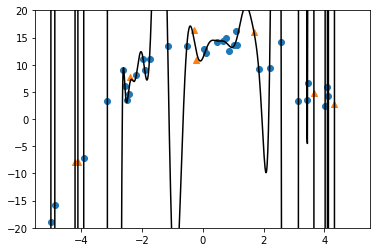

Polynomial coefficients
[11.201212734816135, 11.815729645989112, 50.25204503777225, -224.14128906841293, -80.11542160572384, 1053.659892297145, -529.7076477079706, -1728.0639738093812, 1344.6845691089295, 1401.4848986752736, -1326.47674517551, -650.6819798205263, 720.4441008100384, 182.3387980989225, -240.7576539230828, -30.067132510761407, 51.472133364789194, 2.3460443415270915, -6.991400043615808, 0.061915451789176, 0.5635293384865743, -0.028377342964886546, -0.0208233476546168, 0.001872405673319225, -0.000207493649022479, 2.2851665881700563e-06, 2.916671517836164e-05, -3.1378052565874934e-06, 5.700407170984039e-07, -5.485566773504406e-08, -2.6428171696085656e-08, 3.291373246003328e-09, -1.5908000006940977e-09, 2.1029683992258975e-10, -2.7284899895592862e-11, 4.634584272154912e-12, 8.563280772869513e-13, -7.55565137890426e-14, 7.781701239937806e-14, -1.1023596829572058e-14, 3.040402386212895e-15, -5.465605823391868e-16, 7.144969850636476e-17, -1.7661771726520688e-17, 3.33607049705000

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.001,normalize=True)
model_L1_reg.fit(X_poly,Y )
print(model_L1_reg.coef_)
#fit_intercept when equal false we inform model to make bais = 0 no bais not add 1 columns to feature 

[ 5.82000920e-001 -8.36282743e-001  0.00000000e+000 -1.76586327e-002
  1.17950608e-003  0.00000000e+000  9.33108747e-005  3.28094110e-005
  6.62160858e-008  2.13650564e-007  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+00, tolerance: 2.

Training error (rmse): 1.8482868532292012
Testing error (rmse): 1.9231433545698244


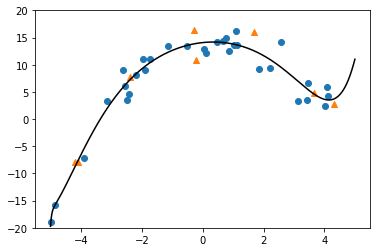

Polynomial coefficients
[14.075352890572924, 0.5820009195780005, -0.8362827434323801, 0.0, -0.01765863273260461, 0.0011795060833611854, 0.0, 9.331087469073496e-05, 3.280941098867239e-05, 6.621608584459317e-08, 2.1365056430792283e-07, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 2.271394085179008e-87, -4.113495039400078e-87, 8.009909946076156e-88, -1.5658610527026877e-88, 3.0504782862939607e-89, -5.961319402787776e-90, 1.16176168509069

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.01,normalize=True)
model_L2_reg.fit(X_poly,Y )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.01, normalize=True)

Training error (rmse): 1.8597304969249662
Testing error (rmse): 1.9196661352962394


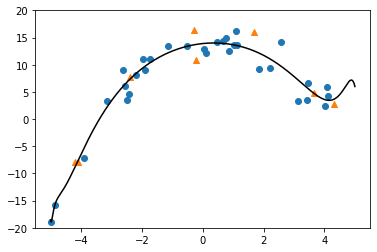

Polynomial coefficients
[13.894610834799428, 0.574076894986718, -0.7850343124471739, 0.005477614606647418, -0.015849695168011067, 0.0008599944586837857, -5.542866556193113e-05, 5.141060603855025e-05, 8.650631167154516e-06, 1.8427715234701938e-06, 4.501476460411008e-07, 4.675271336780304e-08, 1.5928123330568218e-08, 7.598296614334368e-10, 4.739013762926804e-10, -2.681362420214534e-12, 1.2399613390842214e-11, -9.035747662844096e-13, 2.790657148374957e-13, -5.1007087552297766e-14, 4.662021337757964e-15, -2.1727836355626333e-15, 4.4573833321741444e-18, -8.114922939415548e-17, -4.618825886419102e-18, -2.787420329701313e-18, -3.026557450742376e-19, -8.964805093700887e-20, -1.471992520565574e-20, -2.707202102232404e-21, -6.359471827927174e-22, -7.591874947506051e-23, -2.5819529836572227e-23, -1.9087065967151838e-24, -1.0104939829038562e-24, -3.857428962037882e-26, -3.8652579242335403e-26, -3.1783062208314774e-28, -1.4572034355698898e-27, 2.5910919720991147e-29, -5.443965403844916e-29, 2.22046

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,1.681532,16.070558,16.057553,12.569741,12.552660
1,-2.395077,7.723543,6.596307,7.204626,7.325401
2,3.653099,4.833669,4.843145,4.612521,4.733279
3,-4.195542,-7.812998,-7.803609,-8.742979,-8.809630
4,-0.234030,10.927272,13.069275,13.893290,13.717144
5,-0.278573,16.365057,14.413702,13.848217,13.673552
6,-4.101756,-7.821475,-7.814809,-7.677439,-7.696436
7,4.328338,2.748648,2.760417,3.746939,3.697463
